In [76]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RandomizedSearchCV
from keras.optimizers import Adam
from sklearn.model_selection import KFold   
import tensorflow
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.models import Model
from sklearn.datasets import make_classification

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# Import KerasClassifier from keras wrappers
from keras.wrappers.scikit_learn import KerasClassifier

In [78]:
Data_clean = pd.read_excel('data_balanced.xlsx')
Data_clean.head()

,Age,Amount_netCN,TermOfPaymentDays,GDP by State,Unemployment rate,DefaultStatus,month1,month2,month3,month4,month5,Feq_default_ZipCode
0,55,60.87,30,47900,0.027,0,0,1,0,0,0,0.000000
1,79,70.87,30,46300,0.031,0,1,0,0,0,0,0.250000
2,47,110.78,30,46700,0.045,0,0,1,0,0,0,0.142857
3,66,70.77,30,39400,0.066,0,0,1,0,0,0,0.000000
4,68,140.76,30,46300,0.031,0,0,1,0,0,0,0.142857


In [79]:
Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 12 columns):
Age                    1812 non-null int64
Amount_netCN           1812 non-null float64
TermOfPaymentDays      1812 non-null int64
GDP by State           1812 non-null int64
Unemployment rate      1812 non-null float64
DefaultStatus          1812 non-null int64
month1                 1812 non-null int64
month2                 1812 non-null int64
month3                 1812 non-null int64
month4                 1812 non-null int64
month5                 1812 non-null int64
Feq_default_ZipCode    1812 non-null float64
dtypes: float64(3), int64(9)
memory usage: 170.0 KB


In [80]:
#Data_clean = data[["Age","Amount_netCN", "InstalmentPlan", 'GDP by State', 'Main city', 'Unemployment rate', "DefaultStatus" ]]

In [81]:
# Print a null value column array
print(Data_clean.columns[Data_clean.isnull().any()])

Index([], dtype='object')


In [82]:
# Data_clean.dropna(subset=['GDP by State', 'Unemployment rate'], inplace=True)
# Data_clean.reset_index(drop=True)

In [83]:
X = Data_clean.loc[:, Data_clean.columns != "DefaultStatus"]
y = Data_clean[["DefaultStatus"]]

In [84]:
#dataset = Data_clean.values

In [85]:
#dataset

In [86]:
# split into input (X) and output (y) variables
X = X.values
y = y.values

In [87]:
X.shape

(1812, 11)

In [88]:
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [89]:
X_scale

array([[0.5       , 0.10797128, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.82432432, 0.12915457, 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.39189189, 0.21369712, 0.        , ..., 0.        , 0.        ,
        0.14285714],
       ...,
       [0.45945946, 0.15014722, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.43243243, 0.12915457, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.67567568, 0.27720465, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3, random_state= 123)

In [91]:
print(X_train.shape,X_test.shape, Y_train.shape,  Y_test.shape)

(1268, 11) (544, 11) (1268, 1) (544, 1)


In [92]:
def create_model_layer(nl=1,nn=256, learning_rate=0.01, activation='relu'):
    # Create an Adam optimizer with the given learning rate
    opt = Adam(lr=learning_rate)
    model = Sequential()
    model.add(Dense(32, input_shape=(11,), activation='relu'))
    model.add(BatchNormalization())
    # Add as many hidden layers as specified in nl
    for i in range(nl):
        # Layers have nn neurons
        model.add(Dense(nn, activation='relu'))
        model.add(BatchNormalization())
    # End defining and compiling model...
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [93]:
# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model_layer) 

In [94]:
# Define parameters, named just like in create_model()
params = dict(nl=[2, 3], nn=[32,64])

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                       patience=5)

random_search_results = random_search.fit(X_train,Y_train, validation_data=(X_test, Y_test),
           callbacks=[monitor_val_acc])

print("Best: %f using %s".format(random_search_results.best_score_,
random_search_results.best_params_))

Train on 845 samples, validate on 544 samples
Epoch 1/1
423/423 [==============================] - 0s 41us/step
Train on 845 samples, validate on 544 samples
Epoch 1/1
423/423 [==============================] - 0s 35us/step
Train on 846 samples, validate on 544 samples
Epoch 1/1
422/422 [==============================] - 0s 38us/step
Train on 845 samples, validate on 544 samples
Epoch 1/1
423/423 [==============================] - 0s 40us/step
Train on 845 samples, validate on 544 samples
Epoch 1/1
423/423 [==============================] - 0s 36us/step
Train on 846 samples, validate on 544 samples
Epoch 1/1
422/422 [==============================] - 0s 36us/step
Train on 845 samples, validate on 544 samples
Epoch 1/1
423/423 [==============================] - 0s 39us/step
Train on 845 samples, validate on 544 samples
Epoch 1/1
423/423 [==============================] - 0s 36us/step
Train on 846 samples, validate on 544 samples
Epoch 1/1
422/422 [==============================] - 0s 35

In [95]:
random_search_results.best_score_

0.8083596136949792

In [96]:
random_search_results.best_params_

{'nn': 32, 'nl': 2}

In [97]:
model_best_layer = KerasClassifier(build_fn = create_model) 
model_best_layer = model_best_layer.set_params(**random_search_results.best_params_)

In [98]:
#X, y = make_classification()
model_best_layer.fit(X_train, Y_train)
# This is what you need
model_best_layer.model.summary()

Epoch 1/1
1268/1268 [==============================] - 1s 424us/step - loss: 0.3579 - accuracy: 0.8383
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_298 (Dense)            (None, 32)                384       
_________________________________________________________________
batch_normalization_219 (Bat (None, 32)                128       
_________________________________________________________________
dense_299 (Dense)            (None, 32)                1056      
_________________________________________________________________
batch_normalization_220 (Bat (None, 32)                128       
_________________________________________________________________
dense_300 (Dense)            (None, 32)                1056      
_________________________________________________________________
batch_normalization_221 (Bat (None, 32)                128       
________________

In [100]:
nn=random_search_results.best_params_['nn']
nn

32

In [101]:
nl=random_search_results.best_params_['nl']
nl

2

In [105]:
# Creates a model given an activation and learning rate
def create_model(learning_rate=0.01, activation='relu'):
	# Create an Adam optimizer with the given learning rate
	opt = Adam(lr=learning_rate)
	# Create your binary classification model
	model = Sequential()
	model.add(Dense(32, input_shape=(11,), activation=activation))
	model.add(BatchNormalization())
	# Add as many hidden layers as specified in nl
	for i in range(nl):
		# Layers have nn neurons
		model.add(Dense(nn, activation=activation))
		model.add(BatchNormalization())
    # End defining and compiling model...
	model.add(Dense(1, activation='sigmoid'))
	# Compile your model with your optimizer, loss, and metrics
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [106]:
# Create a KerasClassifier
model = KerasClassifier(build_fn = create_model) 

In [107]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
# Check how your keras model performs with 5 fold crossvalidation
kfold = cross_val_score(model, X_train, Y_train, cv=5)
# Print the mean accuracy per fold
kfold.mean()


Epoch 1/1
254/254 [==============================] - 0s 234us/step
Epoch 1/1
254/254 [==============================] - 0s 291us/step
Epoch 1/1
254/254 [==============================] - 0s 228us/step
Epoch 1/1
253/253 [==============================] - 0s 222us/step
Epoch 1/1
253/253 [==============================] - 0s 233us/step


0.6488593459129334

In [108]:
# Define the parameters to try out
params = {'activation': ['relu', 'tanh'], 'batch_size': [32, 128], 
          'epochs': [50, 100], 'learning_rate': [0.1, 0.01]}

# Create a randomize search cv object passing in the parameters to try
random_search = RandomizedSearchCV(model, param_distributions = params, cv = KFold(3))

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                       patience=5)

random_search_results = random_search.fit(X_train,Y_train, validation_data=(X_test, Y_test),
           callbacks=[monitor_val_acc])

print("Best: %f using %s".format(random_search_results.best_score_,
random_search_results.best_params_))


.2576 - accuracy: 0.8959 - val_loss: 0.5263 - val_accuracy: 0.6029
Epoch 15/50
845/845 [==============================] - 0s 42us/step - loss: 0.2921 - accuracy: 0.8828 - val_loss: 0.3902 - val_accuracy: 0.8621
Epoch 16/50
845/845 [==============================] - 0s 51us/step - loss: 0.2949 - accuracy: 0.8734 - val_loss: 0.6079 - val_accuracy: 0.7114
Epoch 17/50
845/845 [==============================] - 0s 41us/step - loss: 0.2628 - accuracy: 0.8982 - val_loss: 1.0871 - val_accuracy: 0.5735
Epoch 18/50
845/845 [==============================] - 0s 41us/step - loss: 0.2426 - accuracy: 0.9030 - val_loss: 1.2068 - val_accuracy: 0.5735
Epoch 19/50
845/845 [==============================] - 0s 42us/step - loss: 0.2457 - accuracy: 0.9018 - val_loss: 0.9795 - val_accuracy: 0.5772
Epoch 20/50
845/845 [==============================] - 0s 36us/step - loss: 0.2511 - accuracy: 0.9006 - val_loss: 1.4757 - val_accuracy: 0.5735
Epoch 21/50
845/845 [==============================] - 0s 43us/step -

In [109]:
print("Best: %f using %s".format(random_search_results.best_score_,
random_search_results.best_params_))

Best: %f using %s


In [110]:
random_search_results.best_score_

0.9148264983757061

In [111]:
random_search_results.best_params_

{'learning_rate': 0.1, 'epochs': 50, 'batch_size': 32, 'activation': 'relu'}

In [112]:
# # Import KerasClassifier from keras wrappers
# from keras.wrappers.scikit_learn import KerasClassifier

# # Create a KerasClassifier
# model = KerasClassifier(build_fn = create_model, learning_rate= = 0.001, epochs = 50, 
#                         batch_size = 128, verbose = 0)

# # Calculate the accuracy score for each fold
# kfolds = cross_val_score(model, X_train, Y_train, cv = 3)

# # Print the mean accuracy
# print('The mean accuracy was:', kfolds.mean())

# # Print the accuracy standard deviation
# print('With a standard deviation of:', kfolds.std())

In [113]:
model_best1 = KerasClassifier(build_fn = create_model) 
model_best = model_best1.set_params(**random_search_results.best_params_)

In [114]:
model_best1.get_params()

{'learning_rate': 0.1,
 'epochs': 50,
 'batch_size': 32,
 'activation': 'relu',
 'build_fn': <function __main__.create_model(learning_rate=0.01, activation='relu')>}

In [115]:
model_best.get_params()

{'learning_rate': 0.1,
 'epochs': 50,
 'batch_size': 32,
 'activation': 'relu',
 'build_fn': <function __main__.create_model(learning_rate=0.01, activation='relu')>}

In [116]:
hist=model_best.fit(X_train, Y_train, validation_data=(X_test, Y_test))

Train on 1268 samples, validate on 544 samples
Epoch 1/50
1268/1268 [==============================] - 1s 522us/step - loss: 0.3997 - accuracy: 0.8360 - val_loss: 0.9242 - val_accuracy: 0.5901
Epoch 2/50
1268/1268 [==============================] - 0s 95us/step - loss: 0.2969 - accuracy: 0.8841 - val_loss: 1.1886 - val_accuracy: 0.5404
Epoch 3/50
1268/1268 [==============================] - 0s 99us/step - loss: 0.2527 - accuracy: 0.8991 - val_loss: 0.6569 - val_accuracy: 0.7665
Epoch 4/50
1268/1268 [==============================] - 0s 83us/step - loss: 0.2641 - accuracy: 0.8959 - val_loss: 1.5211 - val_accuracy: 0.5331
Epoch 5/50
1268/1268 [==============================] - 0s 92us/step - loss: 0.2856 - accuracy: 0.8809 - val_loss: 2.3371 - val_accuracy: 0.5460
Epoch 6/50
1268/1268 [==============================] - 0s 82us/step - loss: 0.2317 - accuracy: 0.9077 - val_loss: 0.8358 - val_accuracy: 0.7537
Epoch 7/50
1268/1268 [==============================] - 0s 128us/step - loss: 0.23

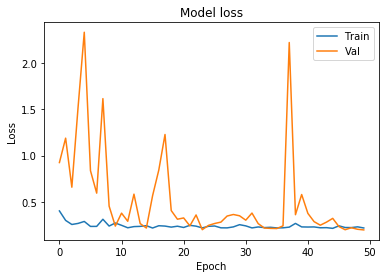

In [117]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

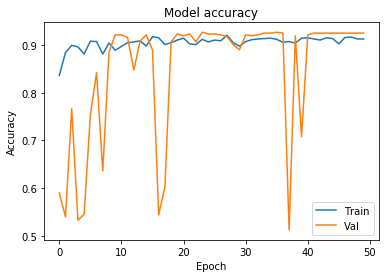

In [118]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

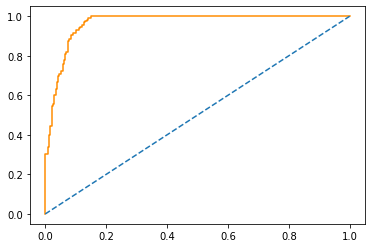

0.9656590248190979


In [119]:
# Plot the ROC curve of the probabilities of default
prob_default_model = model_best.predict_proba(X_test)[:, 1]
fallout, sensitivity, thresholds = roc_curve(Y_test, prob_default_model)  #prob_default is prob
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(Y_test, prob_default_model)
print(auc)

In [120]:
#save model
import pickle
filename = 'neural_model.sav'
pickle.dump(model_best, open(filename, 'wb'))

In [121]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict_proba(X_test)


array([[9.9476498e-01, 5.2350163e-03],
       [8.5890293e-04, 9.9914110e-01],
       [9.9036276e-01, 9.6372366e-03],
       ...,
       [9.9811649e-01, 1.8835068e-03],
       [1.2496591e-02, 9.8750341e-01],
       [1.0021216e-01, 8.9978784e-01]], dtype=float32)